## TERM 2 PAPER [Kuramoto Model]_ MS21098_Prabhakar Kr. Mahto


# Phase vs Time graph

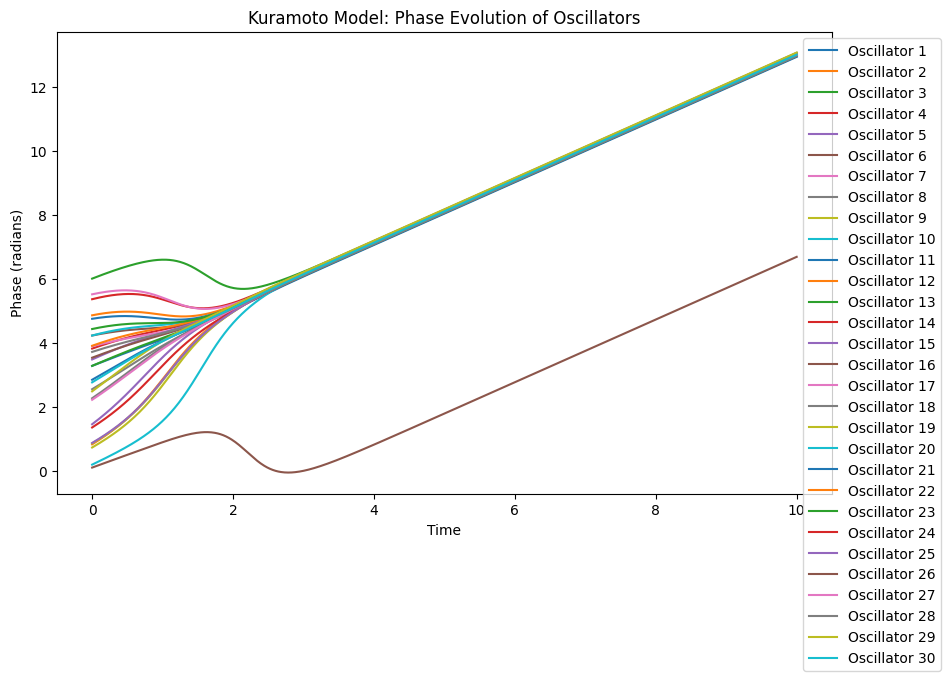

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def kuramoto(theta, omega, K, N, dt):
    """Update rule for the Kuramoto model."""
    dtheta = np.zeros(N)
    for i in range(N):
        # Compute the sum of sine phase differences for the i-th oscillator
        coupling = np.sum(np.sin(theta - theta[i]))
        dtheta[i] = omega[i] + (K / N) * coupling
    # Update phase angles with the computed changes
    theta += dtheta * dt
    return theta

# Parameters
N = 30  # Number of oscillators
K = 3.0  # Coupling strength
T = 10.0  # Total simulation time
dt = 0.01  # Time step

# Initial conditions
theta = np.random.uniform(0, 2 * np.pi, N)  # Random initial phases
omega = np.random.normal(1.0, 0.1, N)  # Natural frequencies (Gaussian)

# Time evolution
timesteps = int(T / dt)
phases_over_time = np.zeros((timesteps, N))

# Simulation loop
for t in range(timesteps):
    theta = kuramoto(theta, omega, K, N, dt)
    phases_over_time[t] = theta  # Store phases at each time step

# Plot results
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(np.linspace(0, T, timesteps), phases_over_time[:, i], label=f'Oscillator {i+1}')
plt.xlabel('Time')
plt.ylabel('Phase (radians)')
plt.title('Kuramoto Model: Phase Evolution of Oscillators')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


The image shows the phase evolution of 30 oscillators over time using the Kuramoto model. The x-axis represents time, while the y-axis represents the phase in radians. Each colored line represents an individual oscillator's phase trajectory. Initially, the oscillators have different phases but tend to synchronize over time, as seen by the convergence of many lines. This model is used to study synchronization phenomena in various systems, such as biological rhythms and neural networks. The legend on the right lists each oscillator from 1 to 30 with corresponding colors.

# Order Parameter vs Time graph

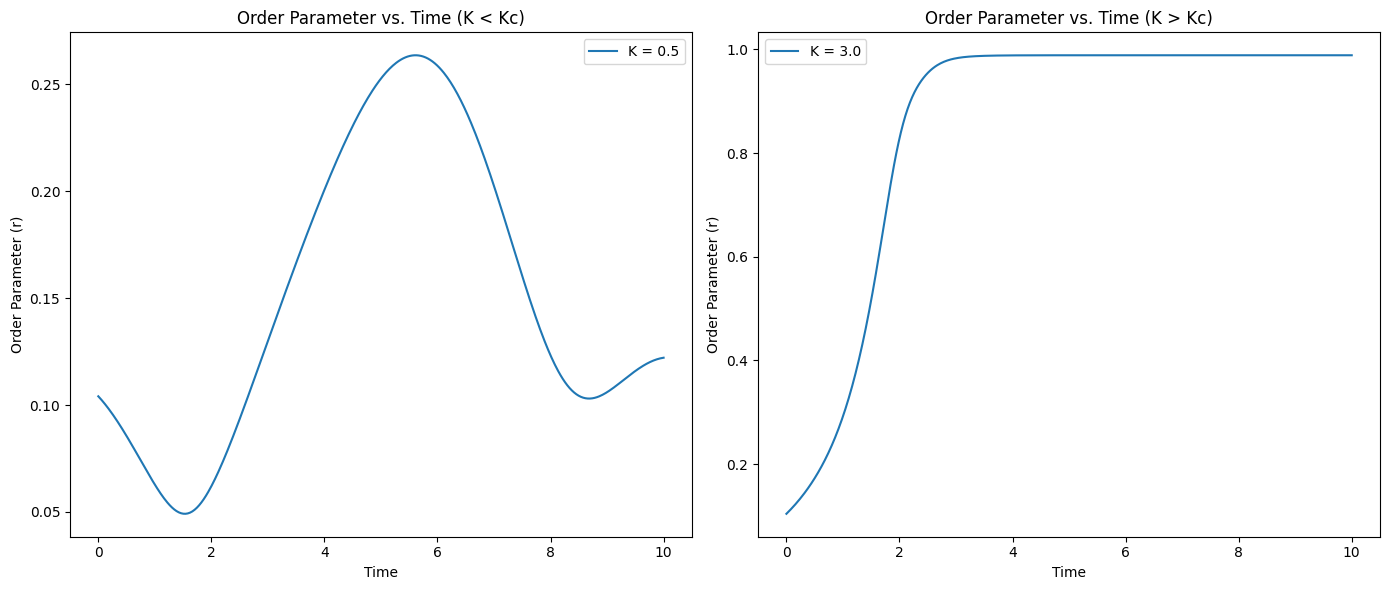

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define parameters for the Kuramoto model
N = 30               # Number of oscillators
K_c = 3.0             # Critical coupling strength (threshold for synchronization)
omega_mean = 0        # Mean natural frequency
omega_std = 0.5       # Standard deviation of natural frequencies

# Generate natural frequencies following a normal distribution
np.random.seed(42)  # For reproducibility
natural_frequencies = np.random.normal(omega_mean, omega_std, N)

# Define the Kuramoto model's differential equations
def kuramoto(theta, t, K, natural_frequencies):
    """Defines the Kuramoto model ODEs."""
    dtheta_dt = np.zeros(N)
    for i in range(N):
        interaction = np.sum(np.sin(theta - theta[i]))
        dtheta_dt[i] = natural_frequencies[i] + (K / N) * interaction
    return dtheta_dt

# Time array for integration
t = np.linspace(0, 10, 500)

# Initial phases (randomly distributed)
theta_0 = np.random.uniform(0, 2 * np.pi, N)

# Integrate the Kuramoto model for K < K_c and K > K_c
coupling_strengths = [0.5, 3.0]  # K < K_c and K > K_c
theta_values = []

for K in coupling_strengths:
    theta = odeint(kuramoto, theta_0, t, args=(K, natural_frequencies))
    theta_values.append(theta)

# Calculate the order parameter r for each time step
def calculate_order_parameter(theta):
    """Calculates the order parameter r for a set of phase angles theta."""
    r = np.abs(np.mean(np.exp(1j * theta), axis=1))
    return r

# Calculate order parameters for both coupling strengths
order_parameters = [calculate_order_parameter(theta) for theta in theta_values]

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for K < K_c

axs[0].plot(t, order_parameters[0], label=f"K = {coupling_strengths[0]}")
axs[0].set_title("Order Parameter vs. Time (K < Kc)")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Order Parameter (r)")
axs[0].legend()

# Plot for K > K_c
axs[1].plot(t, order_parameters[1], label=f"K = {coupling_strengths[1]}")
#axs[1].plot(np,arrange(0,10))
axs[1].set_title("Order Parameter vs. Time (K > Kc)")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Order Parameter (r)")
axs[1].legend()

plt.tight_layout()
plt.show()


Here, the order parameter starts low and rapidly increases, eventually stabilizing at 1.0. These graphs highlight the distinct behaviors of the order parameter in subcritical and supercritical regimes, relevant to the study of phase transitions and synchronization phenomena. Specific K values are indicated in the legends: 0.5 for the left graph and 3.0 for the right graph.

# Order Parameter r_∞ vs Coupling Strength K

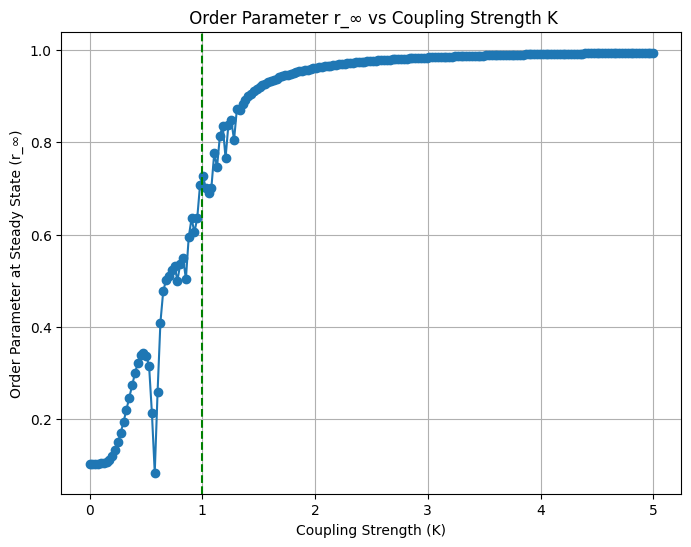

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
N = 30
t_max = 30
dt = 0.1
K_values = np.linspace(0, 5, 200)
omega = np.random.normal(0, 0.5, N)
t = np.arange(0, t_max, dt)
theta_initial = np.random.uniform(0, 2 * np.pi, N)

# Kuramoto model differential equation
def kuramoto(theta, t, K):
    dtheta_dt = np.zeros(N)
    for i in range(N):
        coupling_term = np.sum(np.sin(theta - theta[i]))
        dtheta_dt[i] = omega[i] + (K / N) * coupling_term
    return dtheta_dt

# Array to store r_infinity values
r_infinity_values = []
K_c = 1  # Critical coupling strength

for K in K_values:
    theta_t = odeint(kuramoto, theta_initial, t, args=(K,))
    r_values = np.abs(np.sum(np.exp(1j * theta_t), axis=1) / N)
    r_infinity = np.mean(r_values[int(0.9 * len(r_values)):])
    r_infinity_values.append(r_infinity)

# Plotting r_infinity
plt.figure(figsize=(8, 6))
plt.plot(K_values, r_infinity_values, '-o')
plt.axvline(x=K_c, color='g', linestyle='--', label='K_c')
plt.xlabel('Coupling Strength (K)')
plt.ylabel('Order Parameter at Steady State (r_∞)')
plt.title(' Order Parameter r_∞ vs Coupling Strength K')
plt.grid(True)
plt.show()

 This graph helps to understand phase transitions in systems with coupling interactions, demonstrating how the system becomes more ordered as the coupling strength rises.